In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


From Kaggle:
*The data is broken into two files identity and transaction, which are joined by TransactionID. Not all transactions have corresponding identity information.*

 ### Transaction Dataset information
- TransactionDT: timedelta from a given reference datetime (not an actual timestamp)
- TransactionAMT: transaction payment amount in USD
- ProductCD: product code, the product for each transaction
- card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.
- addr: address
- dist: distance
- P_ and (R__) emaildomain: purchaser and recipient email domain
- C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
- D1-D15: timedelta, such as days between previous transaction, etc.
- M1-M9: match, such as names on card and address, etc.
- Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.
### Categorical Features:
- ProductCD
- card1 - card6
- addr1, addr2
- P_emaildomain
- R_emaildomain
- M1 - M9



### Identiy Dataset information



In [2]:
COLOR = 'white'
matplotlib.rcParams['text.color'] = COLOR
matplotlib.rcParams['axes.labelcolor'] = COLOR
matplotlib.rcParams['xtick.color'] = COLOR
matplotlib.rcParams['ytick.color'] = COLOR

In [3]:
#import dataset
data_file = 'datasets/ieee-fraud-detection/train_transaction.csv'
df_transaction = pd.read_csv(data_file)

df_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_transaction.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

Info for columns is on https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203

In [5]:
# Figure out which features are important
features = ['TransactionID', 'isFraud', 'TransactionDT','TransactionAmt','ProductCD']

In [6]:
df_transaction[features].head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD
0,2987000,0,86400,68.5,W
1,2987001,0,86401,29.0,W
2,2987002,0,86469,59.0,W
3,2987003,0,86499,50.0,W
4,2987004,0,86506,50.0,H


In [7]:
df_card = df_transaction[['card1', 'card2', 'card3', 'card4', 'card5', 'card6']]
df_card.head(10)

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit
5,5937,555.0,150.0,visa,226.0,debit
6,12308,360.0,150.0,visa,166.0,debit
7,12695,490.0,150.0,visa,226.0,debit
8,2803,100.0,150.0,visa,226.0,debit
9,17399,111.0,150.0,mastercard,224.0,debit


In [8]:
df_transaction[[col for col in df_transaction.columns if col.startswith('V')]].head(12)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_transaction[[col for col in df_transaction.columns if col.startswith('M')]].head(12)

,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,T,T,T,M2,F,T,NaN,NaN,NaN
1,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,T,T,T,M0,F,F,F,F,F
3,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,T,T,T,M1,F,T,NaN,NaN,NaN
6,T,T,T,M0,F,F,T,T,T
7,NaN,NaN,NaN,M0,F,F,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,T,T,T,M0,T,T,NaN,NaN,NaN


In [10]:
df_transaction[[col for col in df_transaction.columns if col.startswith('R')]].head(12)

,R_emaildomain
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [11]:
#import identity dataset
data_file = 'datasets/ieee-fraud-detection/train_identity.csv'
df_id = pd.read_csv(data_file)

df_id.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


Vesta Features seem uninterpretable. Certain features are uninterpretable for security reasons.

In [12]:
df_transaction.shape, df_id.shape

((590540, 394), (144233, 41))

In [52]:
# Number of types of emails
df_transaction['P_emaildomain'].unique().shape[0], df_transaction['R_emaildomain'].unique().shape[0]

(60, 61)

In [51]:
df_transaction['P_emaildomain'].value_counts()

gmail.com           228355
yahoo.com           100934
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net          514
gmail                  496
outlook.es             438
mac.com                436
juno.com               322
aim.com                315
hotmail.es             305
windstream.net         305
roadrunner.com         305
hotmail.fr             295
frontier.com           280
embarqmail.com         260
web.de                 240
twc.com                230
n

In [53]:
df_transaction['R_emaildomain'].value_counts()

gmail.com           57147
hotmail.com         27509
anonymous.com       20529
yahoo.com           11842
aol.com              3701
outlook.com          2507
comcast.net          1812
yahoo.com.mx         1508
icloud.com           1398
msn.com               852
live.com              762
live.com.mx           754
verizon.net           620
me.com                556
sbcglobal.net         552
cox.net               459
outlook.es            433
att.net               430
bellsouth.net         422
hotmail.fr            293
hotmail.es            292
web.de                237
mac.com               218
ymail.com             207
prodigy.net.mx        207
optonline.net         187
gmx.de                147
yahoo.fr              137
charter.net           127
mail.com              122
hotmail.co.uk         105
gmail                  95
earthlink.net          79
yahoo.de               75
rocketmail.com         69
embarqmail.com         68
scranton.edu           63
yahoo.es               57
live.fr     

In [70]:
df_transaction[['addr1','addr2']].head(10)


,addr1,addr2
0,315.0,87.0
1,325.0,87.0
2,330.0,87.0
3,476.0,87.0
4,420.0,87.0
5,272.0,87.0
6,126.0,87.0
7,325.0,87.0
8,337.0,87.0
9,204.0,87.0


To do: Check for correlation between the email address and fraud?

In [13]:
# Merging the datasets
df_merged = pd.merge(df_transaction,df_id, on='TransactionID')
df_merged.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,0,86549,75.887,C,16496,352.0,117.0,mastercard,134.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,0,86555,16.495,C,4461,375.0,185.0,mastercard,224.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0,86620,30.000,H,1790,555.0,150.0,visa,226.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [14]:
df_merged.shape

(144233, 434)

### Meanings of hidden features
card4 -> credit card type
card6 -> credit or debit
id_31 -> Browser and version

### Features that can be used directly
- TransactionAMT: transaction payment amount in USD
- ProductCD: product code, the product for each transaction
- addr: address(hard to interpret)
- dist: distance(w/ address)
- P_ and (R__) emaildomain: purchaser and recipient email domain

### Requires more research
- D1-D15: timedelta, such as days between previous transaction, etc.(maybe)
- M1-M9: match, such as names on card and address, etc.(maybe)

Using merged data has more information but less data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017A0DBCD908>,
      dtype=object)

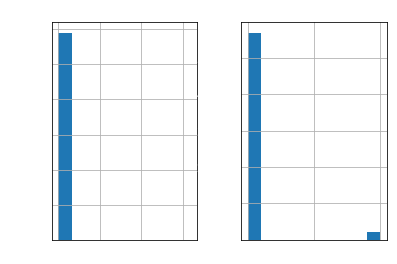

In [15]:
features = ['TransactionID', 'isFraud', 'TransactionDT',
            'TransactionAmt','ProductCD', 'P_emaildomain','R_emaildomain']
df_transaction[['TransactionAmt','isFraud']].hist()

In [16]:
df_transaction[['TransactionAmt','isFraud']].max()

TransactionAmt    31937.391
isFraud               1.000
dtype: float64

In [17]:
df_transaction[['TransactionAmt','isFraud']].corr()

,TransactionAmt,isFraud
TransactionAmt,1.00000,0.01132
isFraud,0.01132,1.00000


In [18]:
df_transaction[features].corr()['isFraud']

TransactionID     0.014166
isFraud           1.000000
TransactionDT     0.013103
TransactionAmt    0.011320
Name: isFraud, dtype: float64

In [21]:
correlations = df_transaction.corr()

In [54]:
correlations['isFraud'].sort_values(ascending=False)[:15]

isFraud    1.000000
V257       0.383060
V246       0.366878
V244       0.364129
V242       0.360590
V201       0.328005
V200       0.318783
V189       0.308219
V188       0.303582
V258       0.297151
V45        0.281832
V158       0.278066
V156       0.275952
V149       0.273282
V228       0.268861
Name: isFraud, dtype: float64

In [58]:
df_transaction['V257'].head(10)

0    NaN
1    NaN
2    NaN
3    NaN
4    1.0
5    NaN
6    NaN
7    NaN
8    1.0
9    NaN
Name: V257, dtype: float64

In [59]:
df_transaction['V257'].value_counts()

1.0     115835
2.0       9578
3.0       2196
4.0        843
5.0        489
6.0        325
7.0        239
8.0        168
9.0        134
10.0       106
11.0        91
12.0        69
13.0        51
14.0        43
16.0        41
15.0        37
17.0        33
18.0        28
19.0        17
20.0        15
21.0         9
22.0         8
0.0          8
33.0         6
23.0         5
35.0         4
29.0         4
24.0         4
32.0         3
36.0         3
25.0         3
26.0         3
34.0         3
28.0         3
30.0         3
27.0         3
31.0         3
40.0         2
39.0         2
38.0         2
37.0         2
44.0         2
42.0         1
41.0         1
43.0         1
48.0         1
45.0         1
46.0         1
47.0         1
Name: V257, dtype: int64